# House Prices Analysis

# Objective of the study is to perform EDA for the variables which will help later to build model later to predict the area which might get affected. 

# Calling libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading in data 

In [3]:
df_train = pd.read_csv('F:/Week 4/EDA_Bangalore/EDA_Chennai_/house_train.csv')

In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Looking at the number of rows and columns using shape function¶

In [30]:
df_train.shape

(1460, 81)

In [8]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
df_train.kurt()

Id                -1.200000
MSSubClass         1.580188
LotFrontage       17.452867
LotArea          203.243271
OverallQual        0.096293
OverallCond        1.106413
YearBuilt         -0.439552
YearRemodAdd      -1.272245
MasVnrArea        10.082417
BsmtFinSF1        11.118236
BsmtFinSF2        20.113338
BsmtUnfSF          0.474994
TotalBsmtSF       13.250483
1stFlrSF           5.745841
2ndFlrSF          -0.553464
LowQualFinSF      83.234817
GrLivArea          4.895121
BsmtFullBath      -0.839098
BsmtHalfBath      16.396642
FullBath          -0.857043
HalfBath          -1.076927
BedroomAbvGr       2.230875
KitchenAbvGr      21.532404
TotRmsAbvGrd       0.880762
Fireplaces        -0.217237
GarageYrBlt       -0.418341
GarageCars         0.220998
GarageArea         0.917067
WoodDeckSF         2.992951
OpenPorchSF        8.490336
EnclosedPorch     10.430766
3SsnPorch        123.662379
ScreenPorch       18.439068
PoolArea         223.268499
MiscVal          701.003342
MoSold            -0

# Histogram for Saleprice

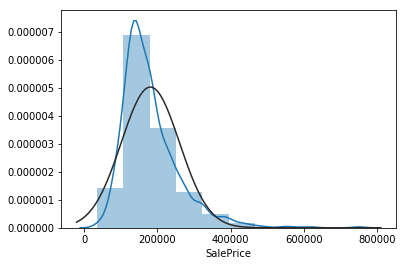

In [22]:
sns.distplot(df_train['SalePrice'],bins=10,kde=True,fit=norm,norm_hist=True);

# skewness and kurtosis of Saleprice

In [16]:
print("Skewness: %f" % df_train['SalePrice'].skew())

Skewness: 1.882876


In [17]:
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Kurtosis: 6.536282


# Let us do some bivariate analysis to see which variables might be good for predicting sales price

# box plot overallqual/saleprice

In [24]:
var='OverallQual'

In [27]:
arr1=np.arange(1,10).reshape(3,3)
arr1

np.concatenate([arr1,arr1])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [38]:
ser1=pd.Series([1,2,3],index=[4,5,6])
ser2=pd.Series([7,8,9],index=[11,12,13])
pd.concat([ser1,ser2],axis=1)

,0,1
4,1.0,NaN
5,2.0,NaN
6,3.0,NaN
11,NaN,7.0
12,NaN,8.0
13,NaN,9.0


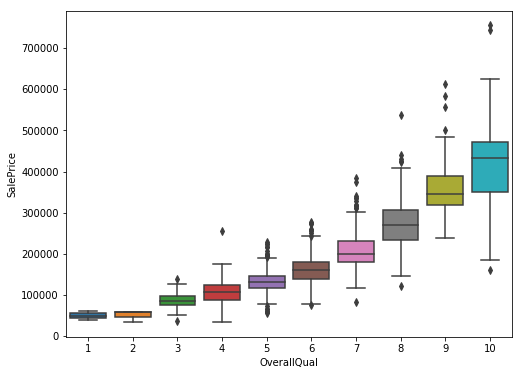

In [41]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
#fig.axis(ymin=0, ymax=800000);


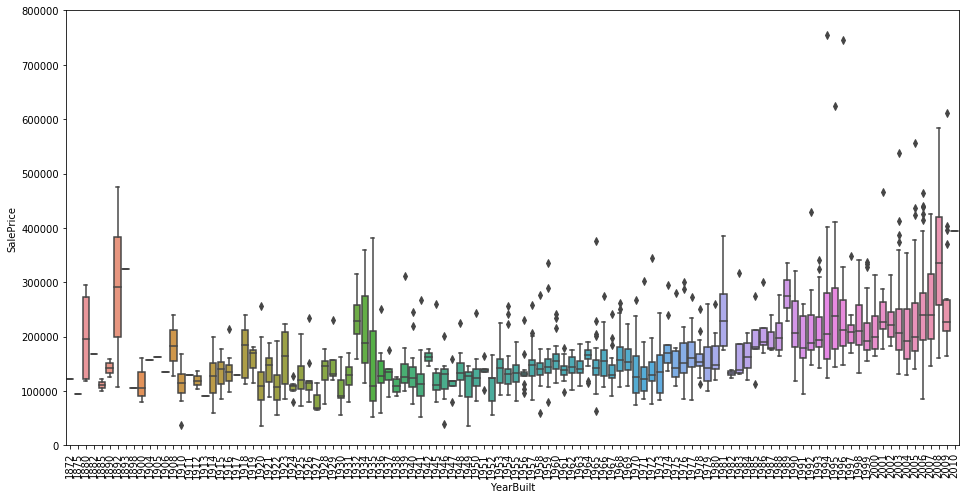

In [43]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

# correlation matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


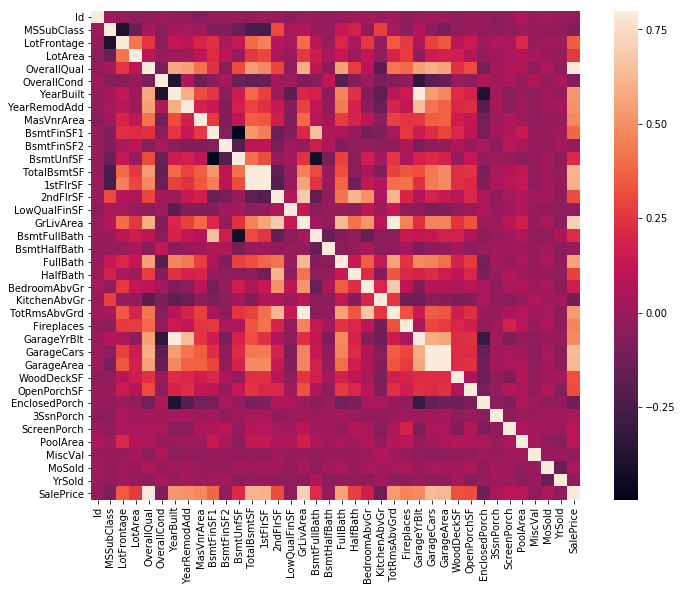

In [42]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

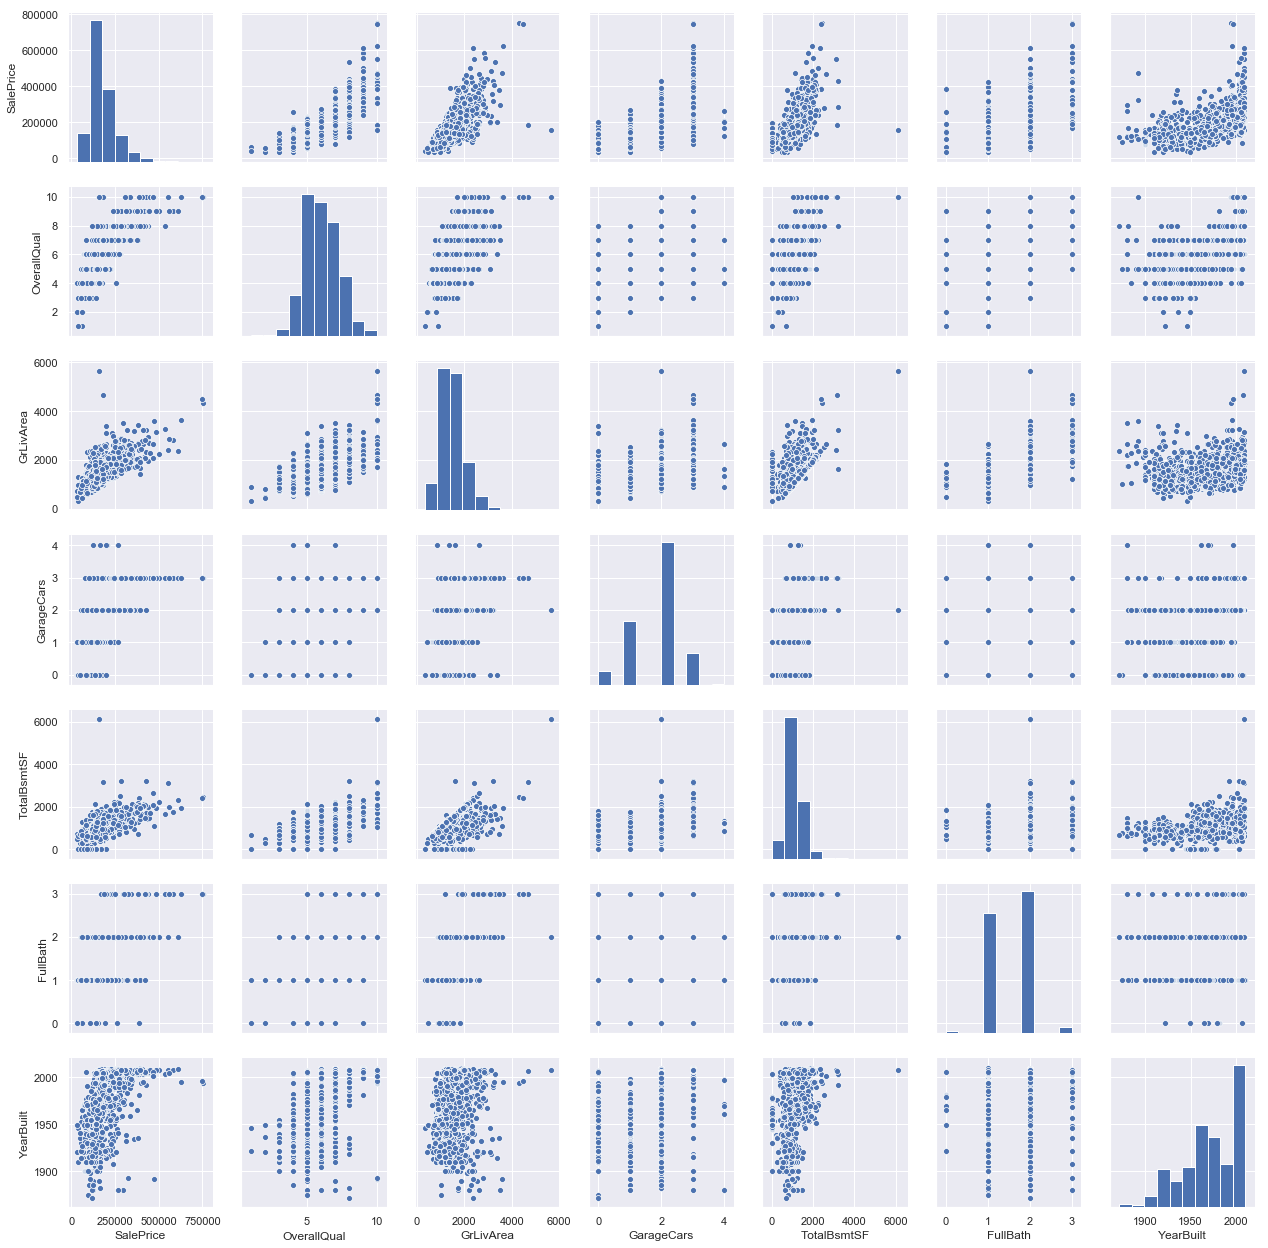

In [13]:
#Let us make this a bit better
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [14]:
corr=df_train.corr()["SalePrice"]
corr

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

# Plotting correlations

[-0.08428413512659526, nan, 0.26384335387140573, 0.7909816005838048, -0.077855894048678, 0.5228973328794969, 0.5071009671113864, nan, 0.38641980624215316, -0.011378121450215136, 0.21447910554696895, 0.6135805515591956, 0.6058521846919147, 0.3193338028320677, -0.02560613000067959, 0.7086244776126522, 0.22712223313149404, -0.01684415429735902, 0.5606637627484456, 0.2841076755947829, 0.16821315430073996, -0.1359073708421411, 0.5337231555820284, 0.46692883675152763, nan, 0.6404091972583531, 0.6234314389183617, 0.3244134445681295, 0.31585622711605543, -0.1285779579259565, 0.04458366533574845, 0.1114465711429111, 0.09240354949187317, -0.021189579640303245, 0.04643224522381939, -0.02892258516873034]


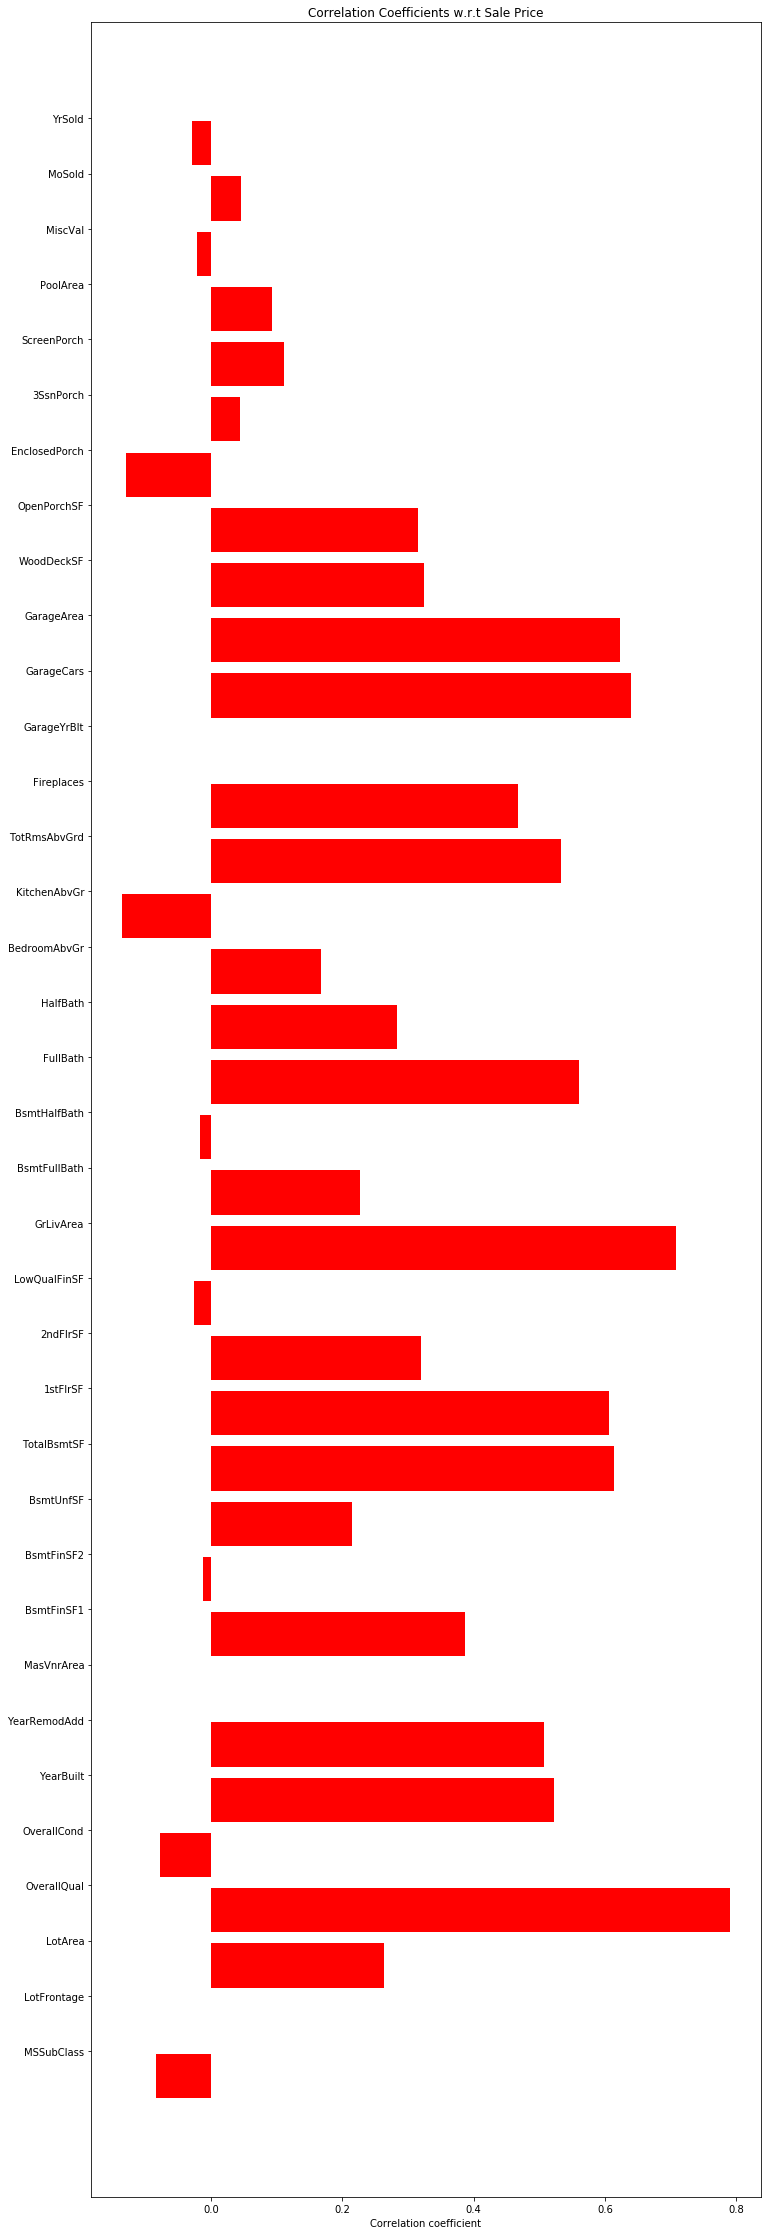

In [64]:
num_feat=df_train.columns[df_train.dtypes!=object]
num_feat=num_feat[1:-1] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(df_train[col].values, df_train.SalePrice.values)[1,0]) #it is matrix of 2x2 so calling 1,0

print(values)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sale Price");

[1, 2, 3]

# Some data transformations
# histogram and normal probability plot

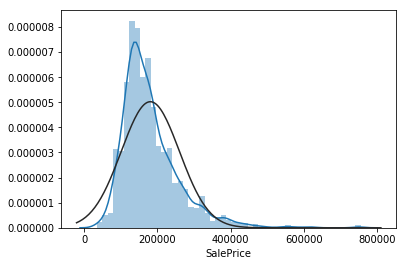

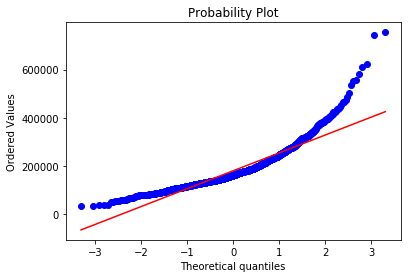

In [65]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

# Applying log transformation

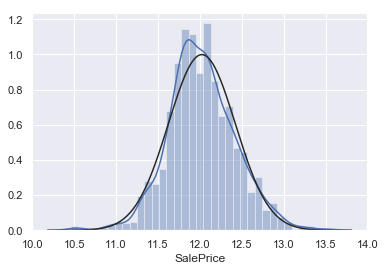

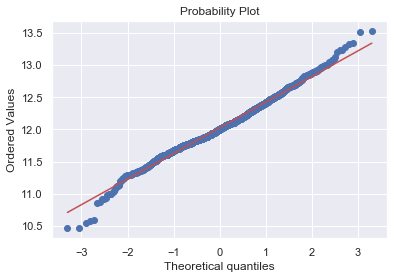

In [15]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

# Histogram and normal probability plot

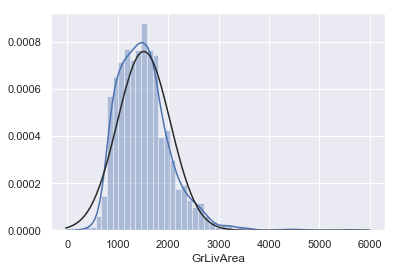

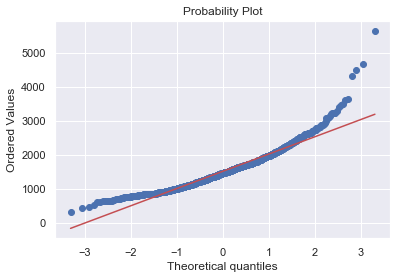

In [18]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

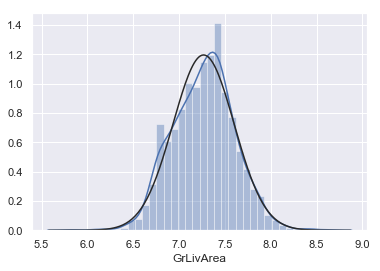

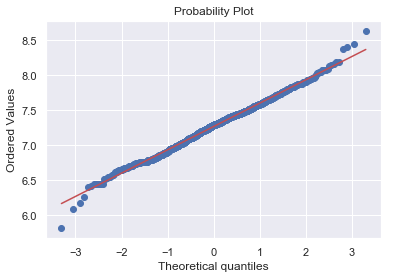

In [19]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

# Histogram and normal probability plot

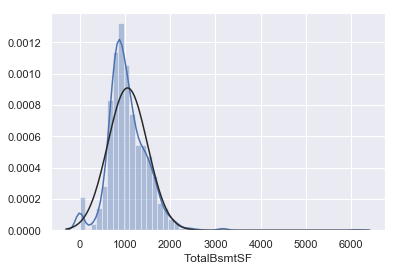

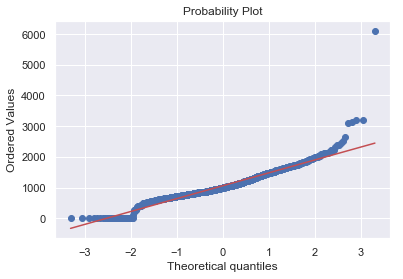

In [20]:
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)


# How about missing values

In [21]:
null_columns=df_train.columns[df_train.isnull().any()]
df_train[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

# Some multivariate analysis

In [22]:
df_train['LotFrontage'].corr(df_train['LotArea'])

0.4260950187718079

In [23]:
df_train['SqrtLotArea']=np.sqrt(df_train['LotArea'])
df_train['LotFrontage'].corr(df_train['SqrtLotArea'])

0.6020022167939362

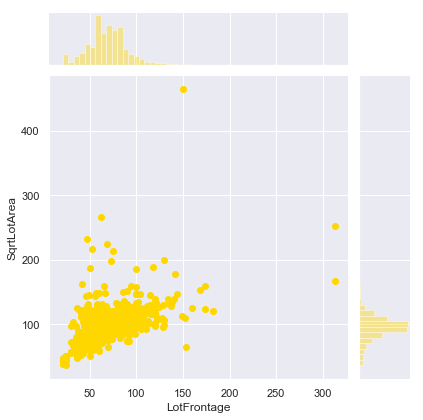

In [24]:
sns.jointplot(df_train['LotFrontage'],df_train['SqrtLotArea'],color='gold');

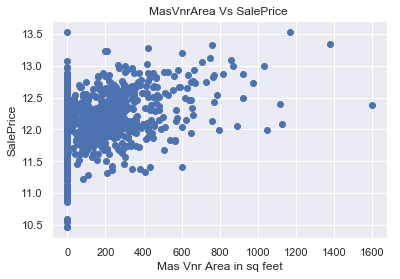

In [25]:
plt.scatter(df_train["MasVnrArea"],df_train["SalePrice"])
plt.title("MasVnrArea Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Mas Vnr Area in sq feet");

# Basement variable

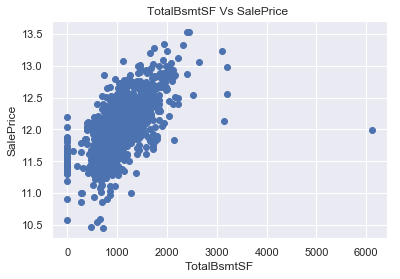

In [26]:
plt.scatter(df_train["TotalBsmtSF"],df_train["SalePrice"])
plt.title("TotalBsmtSF Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("TotalBsmtSF");

# Treatment of outliers
# there are few outliers in total basement area lets remove them

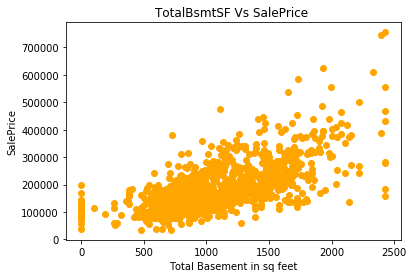

In [66]:
upperlimit = np.percentile(df_train.TotalBsmtSF.values, 99.5)
df_train['TotalBsmtSF'].ix[df_train['TotalBsmtSF']>upperlimit] = upperlimit

plt.scatter(df_train.TotalBsmtSF, df_train["SalePrice"].values,color='orange')
plt.title("TotalBsmtSF Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Total Basement in sq feet");

# Dealing with categorical variables

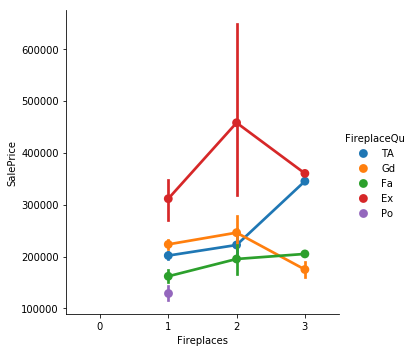

In [67]:
sns.factorplot("Fireplaces","SalePrice",data=df_train,hue="FireplaceQu");

# Does amount of 1st floor area help in sales price prediction

In [ ]:
plt.scatter(df_train["1stFlrSF"],df_train.SalePrice, color='red')
plt.title("Sale Price wrt 1st floor")
plt.ylabel('Sale Price (in dollars)')
plt.xlabel("1st Floor in square feet");

# Create a new variables - sales price per sq ft

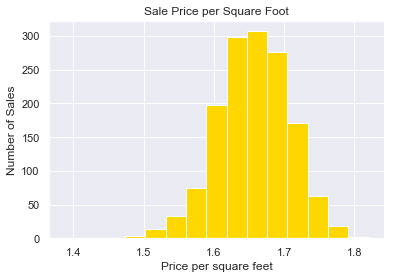

In [31]:
df_train['SalePriceSF'] = df_train['SalePrice']/df_train['GrLivArea']
plt.hist(df_train['SalePriceSF'], bins=15,color="gold")
plt.title("Sale Price per Square Foot")
plt.ylabel('Number of Sales')
plt.xlabel('Price per square feet');

In [32]:
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
import statsmodels.formula.api as sm

# Let us now do a very small prediction

In [33]:
result = sm.OLS( df_train['SalePrice'], df_train['TotalBsmtSF'] ).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                 1.086e+04
Date:                Mon, 05 Nov 2018   Prob (F-statistic):               0.00
Time:                        15:52:14   Log-Likelihood:                -4145.9
No. Observations:                1460   AIC:                             8294.
Df Residuals:                    1459   BIC:                             8299.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
TotalBsmtSF     0.0100   9.59e-05    104.217      0.000       0.010       0.010
==============================================================================
Omnibus:                       49.291   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.719
Skew:                          -0.320   Prob(JB):                     1.62e-16
Kurtosis:                       3.886   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# In class lab WAP : Perform EDA on the given data set
    DataSet Name: ForestFire Dataset

# This dataset contains 517rows and 13 columns. These are the observations collected from the northeast region of Portugal, with the aim of predicting the burned area (or size) of forest fires. 

# perform an exploratory data analysis (EDA) in such a way that the data is well prepared to build a suitable model which can predict the burned area of forest fires. Also, solve the below questions.

In [ ]:
1.Find head of the data set with first 10 observations 
2.Check for the missing data?
3.Convert to factors of all categorical variables?
4.Visualize the data Distribution of integer or numerical variables using plots?
5.Create Box plot of integer or numerical variables?

In [ ]:
# Take home assignment***

Based on the previous dataset "House Prices", solve the below questions:
1. There are nominal and Ordinal data in the set, divide the total variables into two categories.
2. create a Box Plot of “Area” variable
3. check for the outlier?
4. Detect the outliers if there are any?
5. create box plot on data set where area is greater than zero ?
6. Create a bar plot for Area Vs Month/Days ?
7. Create a scatter plot for required variables?
8. Correlation Plot between all the quantitative fields?